In [1]:
#! pip install matplotlib
#! pip install seaborn
#! pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [3]:
dataset = pd.read_csv("data.csv", delimiter='\t')

In [4]:
dataset.head(10)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
5,1,18,6116,1,28,3193,2,2,12542,1,...,2,1,1,4,1,70,2,1,4,NaN
6,1,20,4325,1,34,4009,2,38,3604,3,...,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng
7,1,34,4796,1,9,2618,1,39,5823,1,...,2,1,1,2,2,60,1,1,2,Music
8,4,4,3470,4,14,2139,3,1,11043,4,...,1,1,1,12,2,70,2,1,4,Psychology
9,3,38,5187,2,28,2600,4,9,2015,1,...,2,1,1,2,2,60,2,1,3,computer programming


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [6]:
# Check for duplicates on each row.
dataset.duplicated().value_counts()

False    39775
Name: count, dtype: int64

In [7]:
# Check for unique values.
dataset.nunique()

Q1A               4
Q1I              42
Q1E           10879
Q2A               4
Q2I              42
              ...  
race              7
voted             3
married           4
familysize       28
major          5308
Length: 172, dtype: int64

In [8]:
columns  = dataset.columns
print('Attributes',columns)

Attributes Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)


In [9]:
for column in columns:
    print(column)

Q1A
Q1I
Q1E
Q2A
Q2I
Q2E
Q3A
Q3I
Q3E
Q4A
Q4I
Q4E
Q5A
Q5I
Q5E
Q6A
Q6I
Q6E
Q7A
Q7I
Q7E
Q8A
Q8I
Q8E
Q9A
Q9I
Q9E
Q10A
Q10I
Q10E
Q11A
Q11I
Q11E
Q12A
Q12I
Q12E
Q13A
Q13I
Q13E
Q14A
Q14I
Q14E
Q15A
Q15I
Q15E
Q16A
Q16I
Q16E
Q17A
Q17I
Q17E
Q18A
Q18I
Q18E
Q19A
Q19I
Q19E
Q20A
Q20I
Q20E
Q21A
Q21I
Q21E
Q22A
Q22I
Q22E
Q23A
Q23I
Q23E
Q24A
Q24I
Q24E
Q25A
Q25I
Q25E
Q26A
Q26I
Q26E
Q27A
Q27I
Q27E
Q28A
Q28I
Q28E
Q29A
Q29I
Q29E
Q30A
Q30I
Q30E
Q31A
Q31I
Q31E
Q32A
Q32I
Q32E
Q33A
Q33I
Q33E
Q34A
Q34I
Q34E
Q35A
Q35I
Q35E
Q36A
Q36I
Q36E
Q37A
Q37I
Q37E
Q38A
Q38I
Q38E
Q39A
Q39I
Q39E
Q40A
Q40I
Q40E
Q41A
Q41I
Q41E
Q42A
Q42I
Q42E
country
source
introelapse
testelapse
surveyelapse
TIPI1
TIPI2
TIPI3
TIPI4
TIPI5
TIPI6
TIPI7
TIPI8
TIPI9
TIPI10
VCL1
VCL2
VCL3
VCL4
VCL5
VCL6
VCL7
VCL8
VCL9
VCL10
VCL11
VCL12
VCL13
VCL14
VCL15
VCL16
education
urban
gender
engnat
age
screensize
uniquenetworklocation
hand
religion
orientation
race
voted
married
familysize
major


# **Data Preprocessing**

In [10]:
# Extract columns matching the pattern "Q<number>A"
pattern = r'^Q\d+A$'
scale_column = [column for column in dataset.columns if re.match(pattern, column)]
# Create a new DataFrame with the extracted columns
extracted_data = dataset[scale_column]

In [11]:
extracted_data

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,2,4,1,2,4,4,2,3,1,3
39771,3,4,3,4,3,4,4,4,3,4,...,3,4,3,3,3,4,3,3,3,4
39772,2,1,2,1,1,1,1,1,2,1,...,2,1,1,1,1,1,2,1,1,1
39773,3,1,2,2,3,3,3,4,3,1,...,4,2,3,2,1,2,3,2,4,3


In [12]:
#extracted_data.to_csv('mental_health_ex')

In [13]:
#Check if theres any missing or empty item
extracted_data.isnull().sum()

Q1A     0
Q2A     0
Q3A     0
Q4A     0
Q5A     0
Q6A     0
Q7A     0
Q8A     0
Q9A     0
Q10A    0
Q11A    0
Q12A    0
Q13A    0
Q14A    0
Q15A    0
Q16A    0
Q17A    0
Q18A    0
Q19A    0
Q20A    0
Q21A    0
Q22A    0
Q23A    0
Q24A    0
Q25A    0
Q26A    0
Q27A    0
Q28A    0
Q29A    0
Q30A    0
Q31A    0
Q32A    0
Q33A    0
Q34A    0
Q35A    0
Q36A    0
Q37A    0
Q38A    0
Q39A    0
Q40A    0
Q41A    0
Q42A    0
dtype: int64

In [14]:
#Subtract 1 from all the response to change the scale from 1 to 4 to 0 to 3
def sub(data):
    return data.subtract(1,axis=1)
regularized_dataset=sub(extracted_data) 

# Declare the question key to generate the dataset for each dataset
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Depression_keys = []
for i in DASS_keys["Depression"]:
    Depression_keys.append('Q'+str(i)+'A')
Stress_keys = []
for i in DASS_keys["Stress"]:
    Stress_keys.append('Q'+str(i)+'A')
Anxiety_keys = []
for i in DASS_keys["Anxiety"]:
    Anxiety_keys.append('Q'+str(i)+'A')
depression_dataset= regularized_dataset.filter(Depression_keys)
stress_dataset = regularized_dataset.filter(Stress_keys)
anxiety_dataset = regularized_dataset.filter(Anxiety_keys)

In [15]:
#regularized_dataset.to_csv('regularized.csv')

In [16]:
#Obtain the total score for each dataset here
def scores(data):
    col=list(data)
    data['Total_Count']=data[col].sum(axis=1)
    return data
depression_dataset=scores(depression_dataset)
stress_dataset=scores(stress_dataset)
anxiety_dataset=scores(anxiety_dataset)

**Display the newly generated datasets**

In [17]:
depression_dataset.head(10)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,13
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,31
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,4
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,35
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,42


In [18]:
stress_dataset.head(10)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,12
6,0,0,2,0,1,1,1,0,0,1,1,3,1,3,14
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,6
8,3,3,3,3,3,2,3,3,1,3,1,3,1,1,33
9,2,3,3,3,3,3,0,2,3,3,1,3,2,3,34


In [19]:
anxiety_dataset.head(10)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,6
6,0,2,2,2,2,0,2,2,1,1,2,1,1,1,19
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,4
8,3,3,3,3,3,3,3,3,1,3,2,3,3,3,39
9,1,0,2,3,1,3,3,0,2,3,2,3,3,2,28


# **Depression Dataset**

In [20]:
#Declaring function to assign the label
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>=28:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
depression_dataset['Label']=depression_dataset['Total_Count'].apply(condition)
final_depression_dataset = depression_dataset.drop(columns=['Total_Count'])
final_depression_dataset.head(10)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Label
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,Extremely Severe
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,Mild
6,1,3,3,1,3,1,3,2,1,3,2,3,3,2,Extremely Severe
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,Normal
8,2,2,2,3,3,2,2,2,3,3,3,3,2,3,Extremely Severe
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Extremely Severe


Label
Extremely Severe    13577
Severe               6477
Moderate             7079
Mild                 3786
Normal               8856
Name: count, dtype: int64


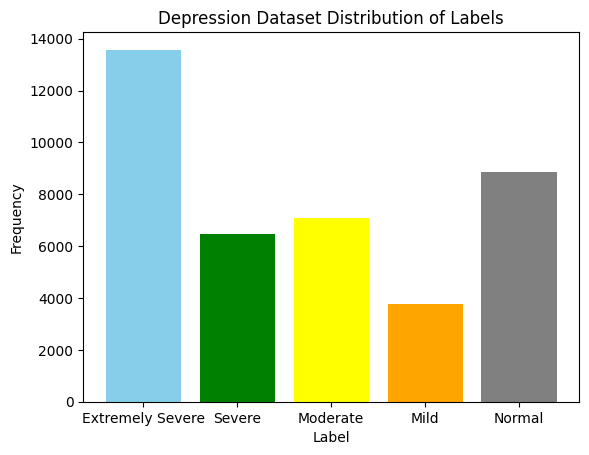

In [21]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_depression_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Depression Dataset Distribution of Labels')

# Show the plot
plt.show()

# **Stress Dataset**

In [22]:
#Declaring function to assign the label
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
stress_dataset['Label']=stress_dataset['Total_Count'].apply(condition)
final_stress_dataset = stress_dataset.drop(columns=['Total_Count'])
final_stress_dataset.head(10)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Label
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,Severe
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,Mild
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,Mild
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,Severe
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,Normal
6,0,0,2,0,1,1,1,0,0,1,1,3,1,3,Normal
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,Normal
8,3,3,3,3,3,2,3,3,1,3,1,3,1,1,Severe
9,2,3,3,3,3,3,0,2,3,3,1,3,2,3,Extremely Severe


Label
Extremely Severe     5749
Severe               8575
Moderate             8730
Mild                 4921
Normal              11800
Name: count, dtype: int64


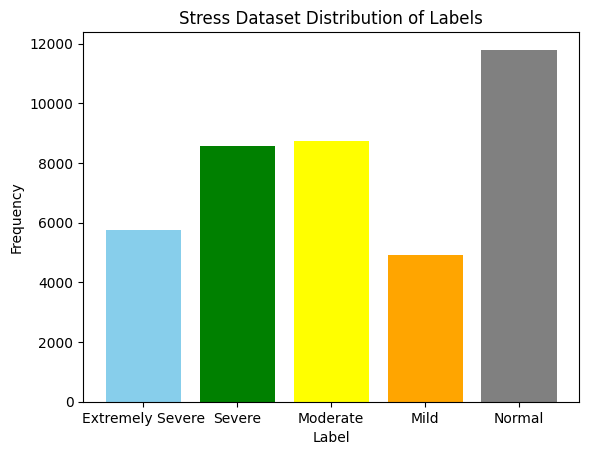

In [23]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_stress_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Stress Dataset Distribution of Labels')

# Show the plot
plt.show()

# **Anxiety Dataset**

In [24]:
#Declaring function to assign the label
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

#Apply the condition and drop the "Total_Count" column
anxiety_dataset['Label']=anxiety_dataset['Total_Count'].apply(condition)
final_anxiety_dataset = anxiety_dataset.drop(columns=['Total_Count'])
final_anxiety_dataset.head(10)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Label
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,Severe
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,Moderate
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,Severe
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,Extremely Severe
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,Normal
6,0,2,2,2,2,0,2,2,1,1,2,1,1,1,Severe
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,Normal
8,3,3,3,3,3,3,3,3,1,3,2,3,3,3,Extremely Severe
9,1,0,2,3,1,3,3,0,2,3,2,3,3,2,Extremely Severe


Label
Extremely Severe    14122
Severe               6113
Moderate             7048
Mild                 2764
Normal               9728
Name: count, dtype: int64


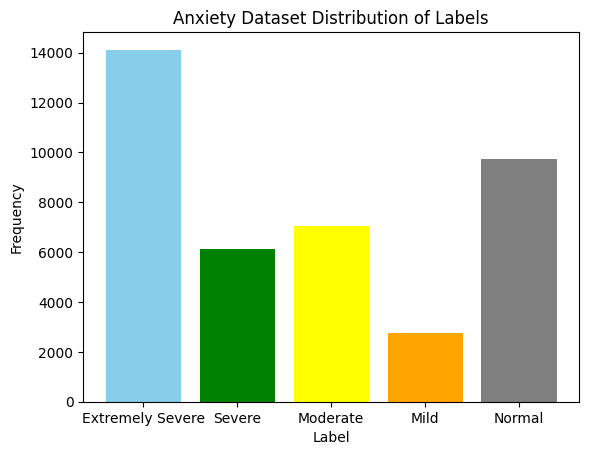

In [25]:
# Define the desired label arrangement
desired_labels = ['Extremely Severe', 'Severe', 'Moderate', 'Mild', 'Normal']

# Count the frequency of each label
label_counts = final_anxiety_dataset['Label'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Anxiety Dataset Distribution of Labels')

# Show the plot
plt.show()

# **Depression Dataset**

In [26]:
#Seperate the data and labels
depression_labels = final_depression_dataset["Label"]
depression_X = final_depression_dataset.drop(columns=["Label"])

In [27]:
depression_labels

0                  Severe
1                  Severe
2        Extremely Severe
3                Moderate
4        Extremely Severe
               ...       
39770    Extremely Severe
39771    Extremely Severe
39772              Normal
39773            Moderate
39774              Severe
Name: Label, Length: 39775, dtype: object

# **Stress Dataset**

In [28]:
#Seperate the data and labels
stress_labels = final_stress_dataset["Label"]
stress_X = final_stress_dataset.drop(columns=["Label"])

In [29]:
stress_labels

0        Extremely Severe
1                  Severe
2                    Mild
3                    Mild
4                  Severe
               ...       
39770                Mild
39771    Extremely Severe
39772              Normal
39773              Severe
39774                Mild
Name: Label, Length: 39775, dtype: object

In [30]:
stress_X

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,1,1,2,1,1,1,1,2,1,2,0,1,0,1
39771,2,3,3,3,3,3,2,3,2,2,2,2,2,2
39772,1,0,0,0,0,0,0,0,1,1,0,1,0,1
39773,2,2,3,2,2,3,2,3,3,2,2,3,2,2


# **Anxiety Dataset**

In [31]:
#Seperate the data and labels
anxiety_labels = final_anxiety_dataset["Label"]
anxiety_X = final_anxiety_dataset.drop(columns=["Label"])

In [32]:
anxiety_labels

0        Extremely Severe
1                  Severe
2                Moderate
3                  Severe
4        Extremely Severe
               ...       
39770            Moderate
39771    Extremely Severe
39772              Normal
39773            Moderate
39774            Moderate
Name: Label, Length: 39775, dtype: object

In [33]:
anxiety_X

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,0,1,0,0,0,3,2,0,1,1,1,1,2,0
39771,3,3,3,2,3,3,3,2,2,2,2,2,2,2
39772,0,0,0,1,0,0,0,0,0,0,0,0,0,0
39773,0,1,2,2,0,0,1,0,0,2,0,1,1,3


# **Model Training and testing**

In [34]:
from keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score

def build_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='softplus', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=64, kernel_size=3, activation='softplus'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='softplus'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_save_model(X_train, y_train, condition):
    model = build_cnn_model(X_train.shape[1:], num_classes=y_train.shape[1])
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    # Save the model
    model.save(f"{condition}_cnn_model.keras")
    return model

def evaluate_cnn_model(X_test, y_test, condition):
    model = load_model(f"{condition}_cnn_model.keras")
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)
    precision = precision_score(np.argmax(y_test, axis=1), predicted_classes, average='weighted')
    recall = recall_score(np.argmax(y_test, axis=1), predicted_classes, average='weighted')
    f1 = f1_score(np.argmax(y_test, axis=1), predicted_classes, average='weighted')
    return precision, recall, f1

# Example usage for CNN model
for condition, X, y in [('Stress', stress_X, stress_labels), ('Depression', depression_X, depression_labels), ('Anxiety', anxiety_X, anxiety_labels)]:
    print(f"Training model for {condition}...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Reshape input data
    X_train_reshaped = np.expand_dims(X_train, axis=-1)
    X_test_reshaped = np.expand_dims(X_test, axis=-1)
    y_train_categorical = to_categorical(LabelEncoder().fit_transform(y_train))
    y_test_categorical = to_categorical(LabelEncoder().fit_transform(y_test))
    model = train_and_save_model(X_train_reshaped, y_train_categorical, condition)
    test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_categorical)
    print(f"Test Accuracy for {condition}: {test_accuracy}")
    precision, recall, f1 = evaluate_cnn_model(X_test_reshaped, y_test_categorical, condition)
    print(f"Precision for {condition}: {precision}")
    print(f"Recall for {condition}: {recall}")
    print(f"F1 Score for {condition}: {f1}")


Training model for Stress...
Epoch 1/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5758 - loss: 0.9985 - val_accuracy: 0.8960 - val_loss: 0.2607
Epoch 2/10
796/796 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8757 - loss: 0.2928 - val_accuracy: 0.9291 - val_loss: 0.1830
Epoch 3/10
260/796 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9002 - loss: 0.2289

KeyboardInterrupt: 

# Prediction

In [37]:
#
#y )
def predict_with_model(X_test,condition):
    model = load_model(f"{condition}_cnn_model.keras")
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1) 
    # Get class with highest probability
    return predicted_classes
indices = {
    'Depression': [2, 4, 9, 12, 15, 16, 20, 23, 25, 30, 33, 36, 37, 41], 
    'Anxiety': [1, 3, 6, 8, 14, 18, 19, 22, 24, 27, 29, 35, 39, 40], 
    'Stress': [0, 5, 7, 10, 11, 13, 17, 21, 26, 28, 31, 32, 34, 38]
}

test = [1, 2, 3, 2, 2, 1, 2, 1, 3, 3, 3, 1, 3, 1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2]

Depression_test = [test[i] for i in indices['Depression']]
Stress_test = [test[i] for i in indices['Stress']]
Anxiety_test = [test[i] for i in indices['Anxiety']]

classes = ["Extremely Severe","Severe","Moderate","Mild","Normal"]



X_depression_test = np.array(Depression_test).reshape(1, len(Depression_test), 1)
p_d = predict_with_model(X_depression_test, 'Depression')
print(p_d)
X_stress_test = np.array(Stress_test).reshape(1, len(Stress_test), 1)
p_s = predict_with_model(X_stress_test, 'Stress')
print(p_s)
X_anxiety_test = np.array(Anxiety_test).reshape(1, len(Anxiety_test), 1)
p_a = predict_with_model(X_anxiety_test, 'Anxiety')
print(p_a)
depression_sevirity = [classes[i] for i in p_d]
stress_sevirity = [classes[i] for i in p_s]
anxiety_sevirity = [classes[i] for i in p_a]

print(depression_sevirity)
print()
print(stress_sevirity)
print()
print(anxiety_sevirity )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[0]
['Extremely Severe']

['Moderate']

['Extremely Severe']


In [38]:
print(sum(Depression_test))
print(sum(Stress_test))
print(sum(Anxiety_test))

32
20
26


In [ ]:
print(Depression_test)
print(Stress_test)
print(Anxiety_test)

[1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1]
[1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0]
